<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#ae09ea;">  Case Study 1

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#ae09ea;">  About the Data set <span style="font-family: Arial; font-weight:bold;font-size:0.8em;color:red;"> (500 Person Body Information)



    GenderGender : Male / Female
    HeightHeight : Number (cm)
    WeightWeight : Number (Kg)
    IndexIndex : 0 - Extremely Weak 1 - Weak 2 - Normal 3 - Overweight 4 - Obesity 5 - Extreme Obesity

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#ae09ea;"> 1.1 Load the libraries:

In [1]:
# load numpy and pandas

import numpy as np
import pandas as pd

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#ae09ea;"> 1.2. Import the dataset(Titanic train.csv):

In [2]:
data = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [3]:
# check shape, info, summary and null values before proceed to do any operation with the data

In [4]:
data.shape

(500, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Gender    500 non-null object
Height    500 non-null int64
Weight    500 non-null int64
Index     500 non-null int64
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [6]:
# there are 4 columns, out of which 3 are numerical and one is categorical column.

In [7]:
data.describe() # by default describe considers only numerical columns

# 25% = Q1, first quartile
# 50% = Q2, second quartile - Median
# 75% = Q3, third quartile
# IQR = Q3-Q1

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [8]:
data.describe(include='all') # it gives both numerical and categorical columns

# top= Mode
# freq = frequency of Mode value

,Gender,Height,Weight,Index
count,500,500.000000,500.000000,500.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,255,NaN,NaN,NaN
mean,NaN,169.944000,106.000000,3.748000
std,NaN,16.375261,32.382607,1.355053
min,NaN,140.000000,50.000000,0.000000
25%,NaN,156.000000,80.000000,3.000000
50%,NaN,170.500000,106.000000,4.000000
75%,NaN,184.000000,136.000000,5.000000


In [9]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [10]:
data.isna().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

1.2a)  Read the data from multiple sources (csv, text, url etc.,)?

1. CSV = pd.read_csv('train.csv')
2. XLSX files = pd.read_excel('train.xlsx', sheetname = 'Invoice')

3. ZIP files =  * import zipfile
            * archive = zipfile.ZipFile('T.zip', 'r')
            * df = archive.read('train.csv')
               
4. Text (txt) = * text_file = open("text.txt", "r")
            *lines = text_file.read()
               
5. JSON file = pd.read_json('train.json')

6. XML file =   *import xml.etree.ElementTree as ET
             *tree = ET.parse('train.xml')
             *root = tree.getroot()
             *print root.tag
               
7. HDF =  pd.read_hdf('train.h5')


## EDA Descriptive Statistics:

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#ae09ea;">  1.3  Measures of Central Tendency

Measures of Central Tendency define significant, representative and adequate values for a set of data, depending on what you want to analyze. They are the 

1. mean
2. median
3. quantiles and mode.

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#ae09ea;">  1.3a) Check the  mean ,Mode, Median and Quantile for data?

#### Mean

In [11]:
data.mean() # to extract mean for all the numerical columns of the data

Height    169.944
Weight    106.000
Index       3.748
dtype: float64

In [12]:
data['Height'].mean() # to extract mean for individual column

169.944

In [13]:
np.mean(data["Height"])

169.944

In [14]:
np.mean(data)

Height    169.944
Weight    106.000
Index       3.748
dtype: float64

#### Mode

In [15]:
data.mode()

,Gender,Height,Weight,Index
0,Female,188.0,50,5.0
1,NaN,NaN,80,NaN
2,NaN,NaN,104,NaN


In [16]:
print(data['Gender'].mode() )
print(data['Height'].mode())
print(data['Weight'].mode()) # Weight column has multiple mode

0    Female
dtype: object
0    188
dtype: int64
0     50
1     80
2    104
dtype: int64


In [17]:
from scipy import stats
stats.mode(data['Weight']) # this gives us only the first value of multiple modes

ModeResult(mode=array([50], dtype=int64), count=array([9]))

In [18]:
import statistics as sts
sts.mode(data['Weight']) # this doesn't print if there is more than one mode

StatisticsError: no unique mode; found 3 equally common values

#### Median and Quantile

In [19]:
data.median()

Height    170.5
Weight    106.0
Index       4.0
dtype: float64

In [20]:
np.median(data['Weight'])

106.0

In [21]:
data['Weight'].median()

106.0

In [22]:
sts.median(data['Weight'])

106.0

In [23]:
stats.median(data['Weight']) # scipy has only mode out of measure of central tendency

AttributeError: module 'scipy.stats' has no attribute 'median'

In [24]:
data['Height'].quantile(0.25) # Q1 

156.0

In [25]:
data['Height'].quantile(0.5) # Q2

170.5

In [26]:
data['Height'].quantile(0.75) # Q3

184.0

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#ae09ea;">1.3b) Plot the density graph of 'Height' mentioned in 'train_df' dataset and overlay mean and meadian for the data?

In [27]:
# Create density plot kind="density"

# create a green line plot for mean  on the density plot:

# create a red line plot for median  on the density plot:

import matplotlib.pyplot as plt
import seaborn as sns

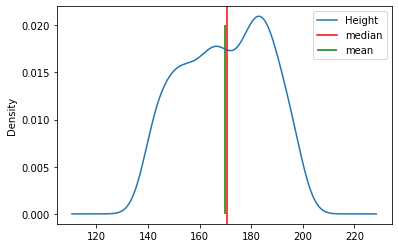

In [28]:
data['Height'].plot(kind='density')
plt.vlines(data['Height'].mean(), label='mean', ymin=0, ymax=0.02, colors = 'green')
#plt.vlines(data['Height'].median(), ymin=0, ymax=0.02, colors = 'red')

plt.axvline(data["Height"].median(), label='median' ,color='red')

# both vlines and axvline are used for displaying a virtual line in the figure. 
plt.legend()
plt.show()

In [29]:
data['Height'].skew() #little skewness , left skewed. 

-0.12191368980139153

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#ae09ea;"> 1.4 Check (Quantile 25%,50%,75%)?

#### Quantile 25%

In [30]:
np.quantile(data["Height"],0.25) #25th percentile - Q1

156.0

In [31]:
data.quantile(0.25)

Height    156.0
Weight     80.0
Index       3.0
Name: 0.25, dtype: float64

In [32]:
data['Height'].quantile(0.25)

156.0

#### Quantile 50%

In [33]:
np.quantile(data["Height"],0.5) #50th percentile - Q2

170.5

In [34]:
data.quantile(0.5)

Height    170.5
Weight    106.0
Index       4.0
Name: 0.5, dtype: float64

In [35]:
data['Height'].quantile(0.5)

170.5

#### Quantile 75%

In [36]:
np.quantile(data['Height'],0.75) #75th percentile - Q3

184.0

In [37]:
data.quantile(0.75)

Height    184.0
Weight    136.0
Index       5.0
Name: 0.75, dtype: float64

In [38]:
data['Height'].quantile(0.75)

184.0

In [39]:
# Find the IQR of Height, Weight and index

In [40]:
data.quantile(0.75) - data.quantile(0.25) # to find IQR for all the columns

Height    28.0
Weight    56.0
Index      2.0
dtype: float64

In [41]:
np.quantile(data['Height'],0.75)-np.quantile(data["Height"],0.25)  # to find IQR specifically for a column

28.0

In [42]:
np.quantile(data['Weight'],0.75)-np.quantile(data["Weight"],0.25)

56.0

In [43]:
np.quantile(data['Index'],0.75)-np.quantile(data["Index"],0.25)

2.0

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#ae09ea;"> 1.5 Measures of Dispersion

Measures of Dispersion are measures that indicate how spread the data is, or how they vary. The measures of dispersion are range, variance, standard deviation and the absolute deviation, or mean absolute deviation.

1.5a)  Find out the Range,Variance,Standard Deviation,Absolute Deviation or Mean Absolute Deviation for the 'Height' column of 'train_df' dataset??

#### Range for height

In [44]:
data['Height'].max() - data['Height'].min()

59

In [45]:
max(data['Height']) - min(data['Height'])

59

#### Variance

In [46]:
data.var() # sample, divide ny N, default ddof = 1

Height     268.149162
Weight    1048.633267
Index        1.836168
dtype: float64

In [47]:
np.var(data['Height'], ddof=1) # here we give ddof as 1, else answer will vary alittle. THen only it will treat it as sample,
# else it will treat as population and divide N-1, hence the value will be little higher when ddof = 0
# Default is population (ddof=0), we need for sample then we need to make ddof=1
# Numpy taked default as 0( not 1). Hence if we use any measure fns of numpy, we must change ddof = 1 to get result for sample.

268.1491623246496

In [48]:
data['Height'].var() # sample, divide by N, default ddof = 1

268.1491623246496

DDOF = 1, for sample

DDOF = 0, for population

We generally go for DDOF = 1

#### Standard Deviation

In [49]:
data.std()

Height    16.375261
Weight    32.382607
Index      1.355053
dtype: float64

In [50]:
data['Height'].std()

16.37526067959376

In [51]:
np.std(data['Height'], ddof=1) # here also we have given ddof as 1.

16.37526067959376

#### Absolute Deviation or Mean Absolute Deviation

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#ae09ea;"> 1.6 Covariance and Correlation

1. Covariance is a numerical measure that indicates the inter-dependency between two variables. 
2. Covariance indicates how two variables behave together in relation to their averages. 
3. A covariance of 0 indicates that the variables are totally independant, while a high and positive covariance value means that a variable is big when the other is big. Analogously, a negative covariance with a high absolute value means that one variable is big when the other is small.
4. Covariance can be calculated through the cov() function. 

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#ae09ea;"> 1.6a) Check the Covariance and Correlation scores . write your Observations?

#### Covariance

In [52]:
data.cov()

,Height,Weight,Index
Height,268.149162,0.236473,-9.368850
Weight,0.236473,1048.633267,35.304609
Index,-9.368850,35.304609,1.836168


<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#ae09ea;"> Observation:
   

From the metrics of the covariance of the columns of the dataset, we can conclude that, Height and Weight are directly proportional to each other. Weight and index are directly proportional to each other. Whereas, Height and Index are indirectly proportional to each other.

#### Correlation

In [57]:
data.corr()

,Height,Weight,Index
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Index,-0.422223,0.804569,1.000000


<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#ae09ea;"> Observation:
    


From the metrics of the correlation of the columns of the dataset we can conclude that, Height and Weight are very slightly related to eachother, it is very minimum that we can even say that they are not even related to each other.
Height and index are indrectly proportional to eachother. Moderately indirectly proportional to eachother.
Weight and index are highly directly proportional to eachother.


<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#ae09ea;">Case Study 2


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#ae09ea;">About the dataset:<span style="font-family: Arial; font-weight:bold;font-size:1em;color:red;">(Motor Trend US Magazine)

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models)

A data frame with 32 observations on 11 (numeric) variables.
* model= carmodels
* mpg =	Miles/(US) gallon
* cyl =	Number of cylinders
* disp=	Displacement (cu.in.)
* hp  =Gross horsepower
* drat=	Rear axle ratio
* wt  =Weight (1000 lbs)
* qsec=1/4 mile time
* vs  =Engine (0 = V-shaped, 1 = straight)
* am  =Transmission (0 = automatic, 1 = manual)
* gear=	Number of forward gears
* carb=	Number of carburetors


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#ae09ea;"> 2.1. Importing the dataset(mtcars.csv.csv):

In [58]:
# import car data
# info
# null values
# describe
# mpg - mean, median, mode, iqr, range

In [59]:
cars = pd.read_csv('mtcars.csv')
cars.head()

,model,mpg,cyl,disp,hp,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.440,17.02,0,0,3,2


In [60]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
model    32 non-null object
mpg      32 non-null float64
cyl      32 non-null int64
disp     32 non-null float64
hp       32 non-null int64
wt       32 non-null float64
qsec     32 non-null float64
vs       32 non-null int64
am       32 non-null int64
gear     32 non-null int64
carb     32 non-null int64
dtypes: float64(4), int64(6), object(1)
memory usage: 2.9+ KB


In [61]:
cars.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [62]:
cars.isna().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [63]:
cars.describe()

,mpg,cyl,disp,hp,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [64]:
print(cars['mpg'].mean())
print(cars.mean().mpg)
print(np.mean(cars['mpg']))

20.090624999999996
20.090624999999996
20.090624999999996


In [65]:
#print(sts.mode(df['mpg']))
print(stats.mode(cars['mpg']))

ModeResult(mode=array([10.4]), count=array([2]))


In [66]:
cars['mpg'].mode()

0    10.4
1    15.2
2    19.2
3    21.0
4    21.4
5    22.8
6    30.4
dtype: float64

In [67]:
print(cars['mpg'].median())
print(cars.median().mpg)
print(np.median(cars['mpg']))
# print(stats.median(cars['mpg'])) - scipy has no attribute median
print(sts.median(cars['mpg']))

19.2
19.2
19.2
19.2


In [68]:
print(cars['mpg'].quantile(0.75) - cars['mpg'].quantile(0.25))
print(np.quantile(cars['mpg'],0.75) - np.quantile(cars['mpg'],0.25))

7.375
7.375


In [69]:
print(cars['mpg'].max() - cars['mpg'].min()) # range
print(max(cars['mpg']) - min(cars['mpg']))

23.5
23.5


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#ae09ea;"> 2.2 check the mtcars.describe()?

In [70]:
cars.describe()

,mpg,cyl,disp,hp,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#ae09ea;">2.3  create a boxplot to visualize the five point summary and IQR. Write your Observations?

In [71]:
# Create boxplot for column="mpg"

# create text(x=0.74, y=22.25, s="3rd Quartile")like Median, 1st Quartile,Min,Max,IQR:
import matplotlib.pyplot as plt
import seaborn as sns

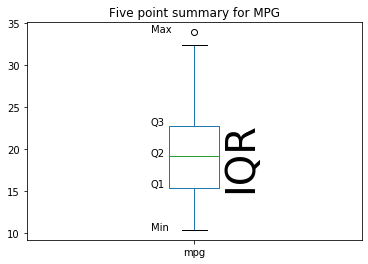

In [72]:
cars['mpg'].plot(kind='box')
plt.text(0.87,cars['mpg'].quantile(0.25), s='Q1')
plt.text(0.87,cars['mpg'].quantile(0.5), s='Q2')
plt.text(0.87,cars['mpg'].quantile(0.75), s='Q3')
plt.text(1.08, cars['mpg'].quantile(0.3), s='IQR', size=40, rotation=90)
plt.text(0.87,cars['mpg'].min(), s='Min')
plt.text(0.87,max(cars['mpg']), s='Max')
plt.title('Five point summary for MPG')
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#ae09ea;"> Observation:


The Q1 of the mpg is around 15, Q2 is around 20, and Q3 is between 20 and 25. Thus the IQR lies between 15 and 23, where the majority of the data lies. The Min of the data(within the LL) us around 10, while the max of the data(within the UL) is around 35.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#ae09ea;"> 2.4 Creat New random.normal(size=100000) to visualize mean and median on a density plot . write your Observations ?

In [73]:
# Create New random.normal(size=100000)


# create density plot new data:

# create a red line plot for mean on the density plot:

## create a green line plot for median on the density plot:


In [74]:
nor_data = pd.DataFrame(np.random.normal(size = 100000))
nor_data.head()

,0
0,0.597279
1,-0.294198
2,-1.535358
3,-0.220207
4,1.078503


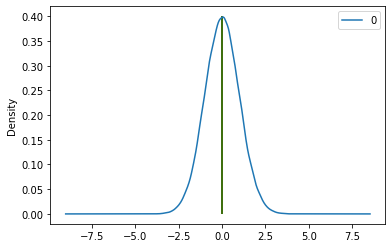

In [75]:
nor_data.plot( kind='density')
plt.vlines(nor_data[0].mean(), ymin=0, ymax=0.4, color='red')
plt.vlines(nor_data.median(), ymin=0, ymax=0.4, color='green')
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#ae09ea;"> Observation:



Observations:
    The mean and the median of the data almost overlaps withe each other. Hence we can conclude that the graph is symmetric
    and not skewed.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#ae09ea;">2.5 Create New skewed_data random.exponential(size=100000) to visualize mean and median on a density plot.  write your Observations?

In [76]:
# create skewed_data exponential(size=100000)):


#create density plot for skewed_data:


# create a red line plot for mean  on the density plot:


## create a green line plot for median  on the density plot:


In [79]:
nor_data_exp = pd.DataFrame(np.random.exponential(size = 100000))
nor_data_exp.head()

,0
0,0.426665
1,1.304833
2,0.908588
3,3.187453
4,0.163261


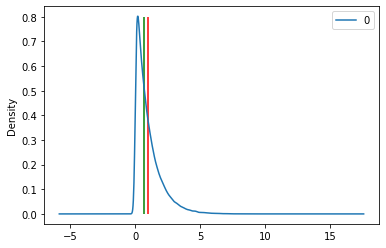

In [80]:
nor_data_exp.plot(kind='kde')
plt.vlines(nor_data_exp.mean(), ymin=0, ymax=0.8, color='red')
plt.vlines(nor_data_exp.median(), ymin=0, ymax=0.8, color='green')
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#ae09ea;"> Observation:



Observations:
    The vline drawn for mean of the data is right to the vline drawn for the median fo the data. Hence we could say that the 
    data is not symmetric and since mean is greater than the median, it is Right SKEWED. If we check the value of te skewness it will be greater than zero.

In [81]:
nor_data_exp[0].skew() # positive skewness, hence it is right skewed.

1.9844037854065033

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#ae09ea;"> 2.6 Create both (Newdata,outliers data ) using random.normal(size=50) to visualize mean and median on a density plot.  write your Observations?

In [82]:
# create a normally distributed data with mean 0 using random.normal(size=50) 

# create a additional outlier data uwith mean >=10 using random.normal(loc=10 size=15) 


# Concatenate both the data sets


# Create a density plot

# create a red line plot for mean on the density plot:


# create a green line plot for median on the density plot:


In [83]:
data_norm = np.random.normal(size=50)
data_norm.mean()

0.2377098417439648

In [84]:
data_outlier = np.random.normal(loc=10, size=15)
data_outlier.mean()

10.368826393069318

In [85]:
data = np.concatenate((data_norm,data_outlier),axis=0)
data

array([ 0.50993315,  0.98632863,  0.91596766, -0.32782232,  0.82352026,
        0.48144847, -0.4125519 ,  0.84468797, -1.16370627, -0.11202509,
       -1.2782525 ,  1.33721355,  0.56986873,  1.13389833, -0.34309513,
        0.86886131, -0.75143207,  1.73586917, -0.90630213,  1.71551913,
       -0.62587607,  1.07146843,  0.65570534, -2.17010838,  2.02166583,
       -1.1744164 ,  2.05297129,  1.36734239, -0.04257674, -1.07761605,
        1.17240555,  0.43059449, -2.38375996,  2.52862975, -0.50260104,
        1.32764065,  0.34098868, -0.06432508, -0.59237768,  0.48811504,
       -0.58977055,  0.0562537 ,  0.31308197,  1.1175594 , -1.46277949,
        0.47757401, -0.75593489,  0.24158876, -0.05103636,  1.08715654,
        6.76144226, 11.0077347 , 10.56547243, 10.33210907, 10.1470154 ,
       10.88958045,  9.4296228 , 11.32106505,  9.88428148, 10.47275724,
        9.95376792, 11.35531896, 11.4145781 , 11.05924177, 10.93840825])

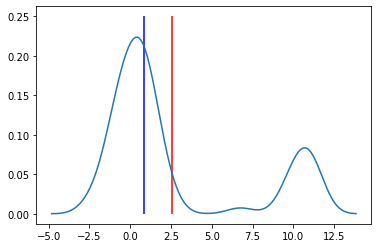

In [87]:
sns.kdeplot(data)
plt.vlines(data.mean(),ymin=0, ymax=0.25, color='red')
plt.vlines(np.median(data),ymin=0, ymax=0.25, color='blue')
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#ae09ea;">Observations:



Observations:
    The kde or density plot for the above data set is above, we can clearly infer that the plot is NOT SYMMETRIC. The mean value is greater than the median of the plot. Hence we can say that the plot is RIGHT SKEWED. If we check the skewness of the graph it will be definitely greater than 0.

In [88]:
pd.DataFrame(data).skew()

0    1.187615
dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#ae09ea;"> 2.7. Skewness and Kurtosis

Beyond measures of center and spread, descriptive statistics include measures that give you a sense of the shape of a distribution. Skewness measures the skew or asymmetry of a distribution while kurtosis measures the "peakedness" of a distribution. 

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#ae09ea;"> 2.7a) Check the Skewness,Kurtosis for mtcars["mpg"]?

#### Skewness

In [89]:
cars['mpg'].skew() # positive skew infers that mean is greater than the median, right skewed graph

0.6723771376290805

#### Kurtosis

In [90]:
cars['mpg'].kurt()

-0.0220062914240855

In [91]:
cars['mpg'].kurtosis()

-0.0220062914240855

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#ae09ea;">2.7b) To explore these two measures further, let's first create some dummy data (norm_data, skewed_data, uniform_data, peaked_data) and inspect it ?

In [0]:
nor_data=np.random.normal(size=100000)
skw_data =np.concatenate((np.random.normal(size=35000)+2,np.random.exponential(size=65000)),axis=0)
uni_data =np.random.uniform(size=100000)
pe_data=np.concatenate((np.random.exponential(size=50000),np.random.exponential(size=50000)*(-1)),axis=0)
x=pd.DataFrame({'Normal':nor_data,'Skew':skw_data,'Uniform':uni_data,'Peak':pe_data})

In [92]:
# Create a normally distributed data 


# Create a skewed_data like np.concatenate((np.random.normal(size=35000)+2,np.random.exponential(size=65000)),axis=0)


# create uniform_data like uniform(0,2, size=100000)


# create peaked_data np.concatenate((np.random.exponential(size=50000),np.random.exponential(size=50000)*(-1)),axis=0)


# create density plot for (norm_data,skewed_data,uniform_data,peaked_data)


In [93]:
# Plot all the four data distributions and observe how they look


In [96]:
nor_data=np.random.normal(size=100000)
skew_data = np.concatenate((np.random.normal(size=35000)+2, np.random.exponential(size=65000)), axis=0)
uni_data = np.random.uniform(0,2, size=100000)
peaked_data = np.concatenate((np.random.exponential(size=50000), np.random.exponential(size=50000)*(-1)), axis=0)

x = pd.DataFrame({'Norm':nor_data,'Skew': skew_data, 'Uniform': uni_data, 'Peaked': peaked_data})

<Figure size 1440x720 with 0 Axes>

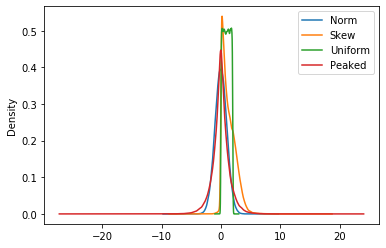

In [102]:
plt.figure(figsize=(20,10))
x.plot(kind='density')
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#ae09ea;"> Observation:



We can find all different graphs above. The normal distibution has almost zero skewness and looks symmetric.
The skew graph is skewed towards the right.
Uniform graph is so flat, we can even call it as plattykurtic.
Peaked graph is so sharp and has very high peakedness value, we may also call it as leptokurtic

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#ae09ea;">2.7c) Lets check Skewness and Kurtosis for dummy data. Write your observations ?

In [104]:
print('Skewness of the above data is')
print(x.skew())
print('Kurtosis of the above data is')
print(x.kurt())

Skewness of the above data is
Norm       0.006603
Skew       0.985961
Uniform   -0.000146
Peaked    -0.008053
dtype: float64
Kurtosis of the above data is
Norm       0.008437
Skew       1.119177
Uniform   -1.205216
Peaked     3.132218
dtype: float64


<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#ae09ea;"> Observation:


As expected, the normal data is no skewed, it is almost symmetric. Skew data is highly skewed, uniform data is also very minimally skewed, we can consider it as also symmetric and so is peaked data.

Kurtosis of normal data is very less and it is almost zero. So it is Mesokurtic. Whereas, skew and peaked data are lepto kurtic, out of which peaked data is highly lepto kurtic(very hihgh peakedness). Uniform data is plattykurtic, no peakedness.

<span style="font-family: Arial; font-weight:bold;font-size:2.4em;color:#dbd406;"> THE END